# Business problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Understanding and defining churn


There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# Reading and Understanding the Data
 - Importing data
 - Understanding the structure of the data

In [3]:
df = pd.read_csv(r"C:\Users\visha\Upgrad\telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
df.shape

(99999, 226)

In [5]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
# Checking unique customers
print("Unique customers in the data are: %d" %len(df.mobile_number.unique()))

Unique customers in the data are: 99999


# Data Cleaning

In [7]:
# Function to identify missing values
def Missing_Columns(missingCutoff):
    missing = round(100*(df.isnull().sum()/df.shape[0]))
    return missing.loc[missing > missingCutoff]
def impute_Missing_Value(data,imputeColList=False,missingColList=False):
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [8]:
Missing_Columns(55)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

Inference: There are few columns which are required for analysis. We can impute these values with 0 for the analysis.

In [9]:
ic = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']
impute_Missing_Value(df,ic)

In [10]:
Missing_Columns(50)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

# Dropping columns with >50% missing values

In [11]:
missingvalues = list(Missing_Columns(50).index)
df.drop(missingvalues,axis=1,inplace=True)
df.shape

(99999, 222)

In [13]:
# identifying columns with more than 5% missing values and imputing it with 0
Missing_Columns(5)

onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

In [14]:
missing_val = list(Missing_Columns(5).index)
df[df[missing_val].isnull().all(axis=1)][missing_val].head()

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# We will impute the NaN values as 0.
impute_Missing_Value(df,missingColList=missing_val)
df = df[~df[missing_val].isnull().all(axis=1)]
df.shape

(99999, 222)

In [17]:
# identifying columns with more than 2% missing values and drop them as these
# customers don't have data for 3 months

Missing_Columns(2)

onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       4.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       4.0
std_og_t2f_mou_8       5.0
std_og_t2c_mou_6       4.0
s

In [18]:
missing_val= list(Missing_Columns(2).index)
df[df[missing_val].isnull().all(axis=1)][missing_val].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df = df[~df[missing_val].isnull().all(axis=1)]
df.shape

(99618, 222)

In [20]:
# As a next setep - for other customers, where these missing values are spread-out, we will now impute the same with zero. 
missing_val.remove('date_of_last_rech_8')
missing_val.remove('date_of_last_rech_9')
impute_Missing_Value(df,missingColList=missing_val)

In [21]:
# Checking for remaining columns for null values
Missing_Columns(0)

loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [22]:
cols = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for c in cols: 
    print("The unique values in column %s are %s" % (c,df[c].unique()))

The unique values in column loc_og_t2o_mou are [ 0. nan]
The unique values in column std_og_t2o_mou are [ 0. nan]
The unique values in column loc_ic_t2o_mou are [ 0. nan]
The unique values in column last_date_of_month_7 are ['7/31/2014' nan]
The unique values in column last_date_of_month_8 are ['8/31/2014' nan]
The unique values in column last_date_of_month_9 are ['9/30/2014' nan]
The unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
The unique values in column date_of_last_rech_8 are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/

In [23]:
# Since some of these features take only one value. 
# We will now impute their missing values in these features with the mode value

cols = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
        'last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in cols:
    print(df[c].value_counts())
    df[c].fillna(df[c].mode()[0], inplace=True)
print("All above features take only one value")


0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64
All above features take only one value


In [24]:
Missing_Columns(0)

date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
dtype: float64

 We will now impute the missing values in these features with the mode value

In [25]:
# Features which are missing together
missing_val = list(Missing_Columns(0).index)
print ("There are %d rows having missing values for these variables."%(len(df[df[missing_val].isnull().all(axis=1)])))

There are 22 rows having missing values for these variables.


In [26]:
df[df['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
df[df['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
df[df['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'
df[df['date_of_last_rech_9'].isnull()]['date_of_last_rech_9'] = '9/30/2014'

In [27]:
# We will now look for columns having all values as 0
col_z = df.columns[(df == 0).all()]
print ("There are {} features which have only 0 as value. These features are \n{}".format(len(col_z),col_z))

There are 11 features which have only 0 as value. These features are 
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [28]:
# We remove the column with single value 0.
df.drop(col_z,axis=1,inplace=True)

In [29]:
# Data left after removing the missing values.
print ("Customers: {}".format(df.shape[0]))
print ("Features: {}".format(df.shape[1]))

Customers: 99618
Features: 211


In [30]:
# Checking for data types and columns names
df.reset_index(inplace=True,drop=True)
# Identifying list of all columns which store date
date_columns = list(df.filter(regex='date').columns)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [31]:
# We will now convert dtype of date columns to datetime
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%m/%d/%Y')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Columns: 211 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(35)
memory usage: 160.4 MB


In [33]:
# We now rename column as per standard:
#'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'

df.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [34]:
 # Creating Derived Columns
for c in range(6,10):
    df['vol_data_mb_'+str(c)] = (df['vol_2g_mb_'+str(c)]+df['vol_3g_mb_'+str(c)]).astype(int)   

# Filter High Value Customers
We need to predict churn only for the high-value customers. Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [35]:
# Creating new feature: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9
for i in range(6,10):
    df['avg_rech_amt_'+str(i)] = round(df['total_rech_amt_'+str(i)]/df['total_rech_num_'+str(i)]+1,2)
impute_Missing_Value(df,missingColList=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9'])


# Creating new feature: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9
#These will store the total number of data recharge (=count_rech_2g + count_rech_3g ) for each of the months

for i in range(6,10):
    df['total_rech_num_data_'+str(i)] = (df['count_rech_2g_'+str(i)]+df['count_rech_3g_'+str(i)]).astype(int)

    
# We will now create new feature: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
for i in range(6,10):
    df['total_rech_amt_data_'+str(i)] = df['total_rech_num_data_'+str(i)]*df['av_rech_amt_data_'+str(i)]

    
#Creating new feature: total_mon_rech_6,total_mon_rech_7,total_mon_rech_8,total_mon_rech_9
for i in range(6,10):
    df['total_month_rech_'+str(i)] = df['total_rech_amt_'+str(i)]+df['total_rech_amt_data_'+str(i)]
df.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


In [36]:
# Calculating the avegare of first two months i . e good phase
good_avg =(df.total_month_rech_6 + df.total_month_rech_7)/2
# finding 70% cutoff as mention in problem statement
hv_cutoff= np.percentile(good_avg,70)

high_value_users = df[good_avg >=  hv_cutoff]
high_value_users.reset_index(inplace=True,drop=True)

print("High Value Customers are: %d\n"% len(high_value_users))
print("Percentage value of High Value Customers: {}%".format(round(len(high_value_users)/df.shape[0]*100),2))


High Value Customers are: 29906

Percentage value of High Value Customers: 30%


# Churned Customers

We will now tag the churned customers (churn=1, else 0) based on the fourth month as per the following definition: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [37]:
def ChurnedCustomers(data,churnPhaseMonth=9):
    churning_features= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
    flag = ~data[[s + str(churnPhaseMonth) for s in churning_features ]].any(axis=1)
    flag = flag.map({True:1, False:0})
    return flag

In [38]:
high_value_users['churn'] = ChurnedCustomers(high_value_users,9)
print("{} users tagged as churners out of the {} High-Value Customers.".format(len(high_value_users[high_value_users.churn == 1]),high_value_users.shape[0]))
print("The High-value Churn Percentage is: {}%".format(round(len(high_value_users[high_value_users.churn == 1])/high_value_users.shape[0] *100,2)))

2418 users tagged as churners out of the 29906 High-Value Customers.
The High-value Churn Percentage is: 8.09%


# Data Analysis & EDA

In [39]:
# Function to plot the histogram with labels
def plot_histogram(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='lightgreen', edgecolor='gray')
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    plt.show()

In [40]:
def plot_avgMonthlyCalls(pltType,data,calltype,colList):
    if pltType == 'multi':
        total_call_mou = pd.DataFrame(data.groupby('aon_bin',as_index=False)[colList].mean())
        total_call_mou['aon_bin']=pd.to_numeric(total_call_mou['aon_bin'])
        total_call_mou
        num=0
        fig, ax = plt.subplots(figsize=(15,8))
        for column in total_call_mou.drop('aon_bin', axis=1):
            num+=1
            ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
         
        plt.legend(loc=2, ncol=2)
        ax.set_xticks(total_call_mou['aon_bin'])
        
        plt.title("Avg.Monthly "+calltype+" MOU  V/S AON", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly "+calltype+" MOU")
    elif pltType == 'single':
        fig, ax = plt.subplots(figsize=(8,4))
        ax.plot(data[colList].mean())
        ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
        
        plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Month")
        plt.ylabel("Avg. "+calltype+" MOU")
        
    plt.show()

In [41]:
def plot_byChurnMou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=high_value_users.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

In [42]:
def plot_byChurn(data,col):
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(high_value_users.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    return high_value_users.groupby('churn')[colList].mean()

In [43]:
# Filtering the common monthly columns for each month
common_col = high_value_users.filter(regex ='_6').columns
monthly_col = [item.strip('_6') for item in common_col]
monthly_col

['last_date_of_month',
 'arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'date_of_last_rech',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'vbc_3g',
 'vol_data_mb',
 'avg_rech_amt',
 'total_rech_num_data',
 'total_rech_amt_data',
 'total_month_rech']

In [44]:
print ("The total number of columns in data are:", high_value_users.shape[1])
print ("The number of columns for each month are: ",len(monthly_col))
print ("The total monthly columns among the orignal columns (%d*4) are: %d"%(len(monthly_col), len(monthly_col) * 4))
print ("The columns other than monthly columns are:", high_value_users.shape[1] - (len(monthly_col) * 4))

The total number of columns in data are: 232
The number of columns for each month are:  57
The total monthly columns among the orignal columns (57*4) are: 228
The columns other than monthly columns are: 4


In [45]:
# Removing all the attributes corresponding to the 9th month 
col_list_9 = high_value_users.filter(regex=('_9')).columns
high_value_users.drop(col_list_9,axis=1,inplace=True)

In [46]:
# Obtaining the list of all the monthly columns 6,7,8,9
allmonthlcol = [x + s for s in ['_6','_7','_8'] for x in monthly_col]
allmonthlcol

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vbc_3g_6',
 'vol_data_mb_6',
 'avg_rech_

In [47]:
non_monthly_col = [col for col in high_value_users.columns if col not in allmonthlcol]
non_monthly_col

['mobile_number', 'circle_id', 'aon', 'churn']

In [48]:
# We will now get the distinct circle_id's in the data
high_value_users.circle_id.value_counts()

109    29906
Name: circle_id, dtype: int64

In [49]:
# Removing columns circle_id as it is providing no value to model and it is unique

high_value_users.drop('circle_id',axis=1,inplace=True)

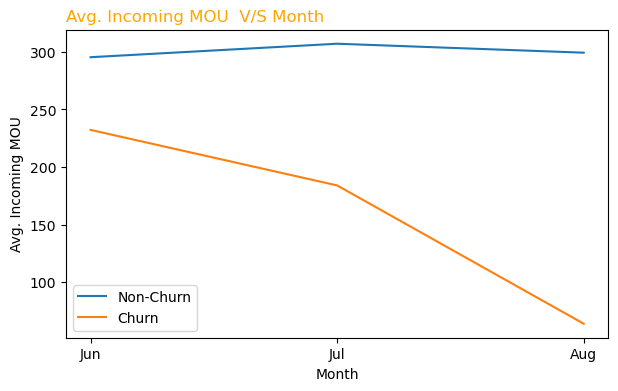

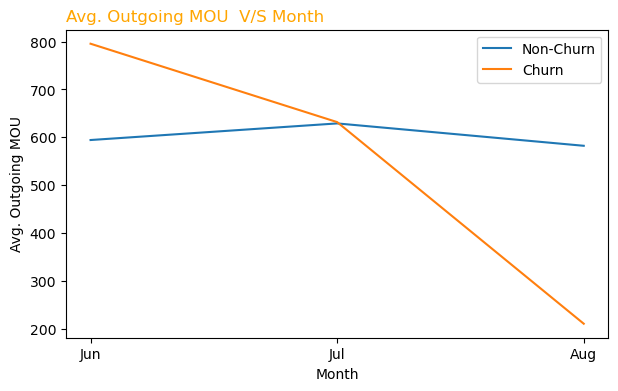

In [50]:
# Incoming/Outgoing MOU v/s Churn
ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_byChurnMou(ic_col,'Incoming')
plot_byChurnMou(og_col,'Outgoing')

From the above mentioned plot, we can note that:

- Churners Avg. Incoming/Outgoing MOUs drops drastically after the 2nd month,Jul.
- While the non-churners Avg. MOUs remains consistant and stable with each month.
- Clearly, users MOU is a key feature to predict churn.

In [51]:
# The average Incoming MOU per month churn vs Non-Churn
high_value_users.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.401726,307.108317,299.319664
1,232.221162,183.978888,63.813168


In [52]:
# The average Outgoing MOU per month churn vs Non-Churn
high_value_users.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,594.414582,629.096568,582.380539
1,795.591038,631.859433,210.659326


We will now create new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8 These features will hold the ratio (=total_og_mou_* / total_ic_mou_*) for each month. These features will combine both incoming and outgoing informations and shall give a better predictor of churn.

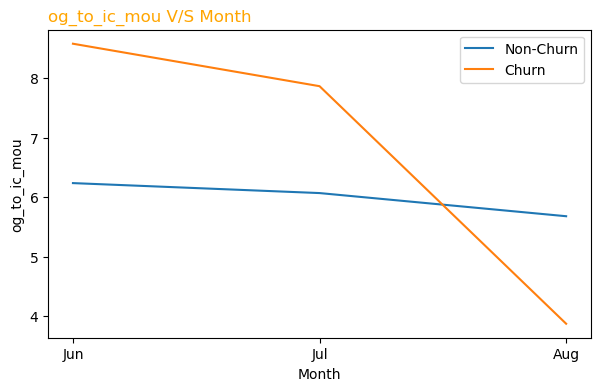

,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8
churn,,,
0,6.235602,6.067952,5.678424
1,8.580257,7.865938,3.870145


In [53]:
# We will now create new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
# Also be adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    high_value_users['og_to_ic_mou_'+str(i)] = (high_value_users['total_og_mou_'+str(i)])/(high_value_users['total_ic_mou_'+str(i)]+1)
plot_byChurn(high_value_users,'og_to_ic_mou')

From above graph we can infer that:

- Outgoing to incoming mou remains drops significantly for churners from month Jul to Aug.
- While it remains almost consistent for the non-churners.

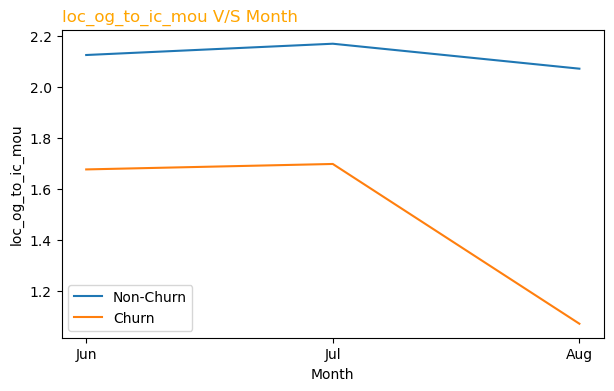

,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8
churn,,,
0,2.124471,2.168763,2.070806
1,1.675413,1.696809,1.069765


In [54]:
# We will now create new feature: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8
for i in range(6,9):
    high_value_users['loc_og_to_ic_mou_'+str(i)] = (high_value_users['loc_og_mou_'+str(i)])/(high_value_users['loc_ic_mou_'+str(i)]+1)

# We have added 1 to denominator to avoid dividing by 0
plot_byChurn(high_value_users,'loc_og_to_ic_mou')

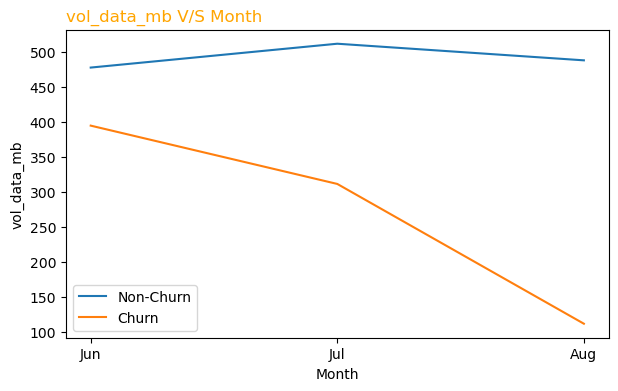

,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8
churn,,,
0,478.037762,512.164072,488.389661
1,394.949545,311.507444,111.469396


In [55]:
# Total data volume v/s Churn
plot_byChurn(high_value_users,'vol_data_mb')

From the above graph, the volume of data used drops significantly for churners from month Jul to Aug.

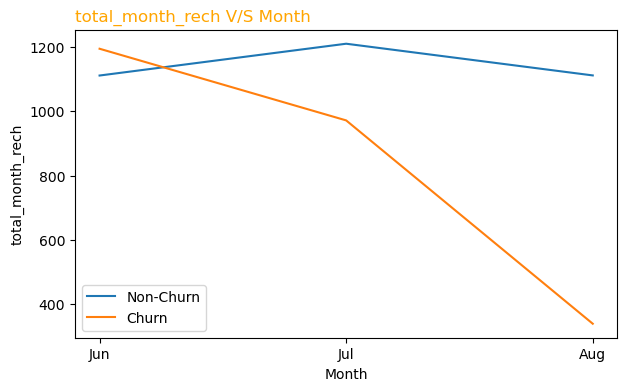

,total_month_rech_6,total_month_rech_7,total_month_rech_8
churn,,,
0,1111.439977,1210.362853,1111.756912
1,1194.747593,971.802758,339.278974


In [56]:
# Total monthly rech v/s Churn
plot_byChurn(high_value_users,'total_month_rech') 

- Above graph indicates that the total monthly rech amount also drops significantly for churners from month Jul to Aug.

- Creating new feature: Total_loc_mou_6, Total_loc_mou_7, Total_loc_mou_8. These features will hold the Total MOU (=loc_og_mou+loc_ic_mou) for each month. Using this we will find if the loc MOU (both incoming and outgoing) drops or increaces as the months goes by. This information shall be a better predictor of churn.

In [57]:
# We will be creating new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
for i in range(6,9):
    high_value_users['Total_loc_mou_'+str(i)] = (high_value_users['loc_og_mou_'+str(i)])+(high_value_users['loc_ic_mou_'+str(i)])

- Now create new features Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8.

- These features will hold the Total roaming MOU (=roam_ic_mou+roam_og_mou) for each month. Using this we will find if the roam MOU (both incoming and outgoing) drops or increaces as the months goes by. This information shall be a better predictor of churn.

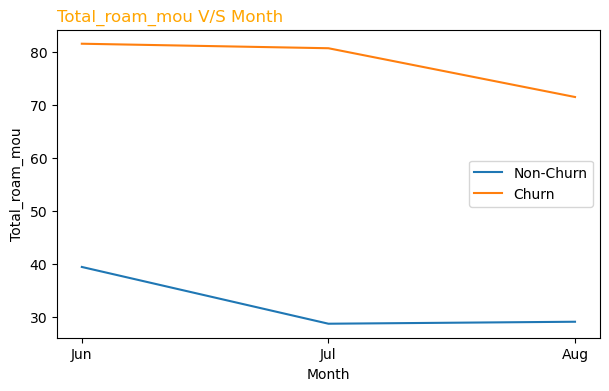

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.360033,28.643301,29.016734
1,81.504156,80.651973,71.443623


In [58]:
# We will create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
for i in range(6,9):
    high_value_users['Total_roam_mou_'+str(i)] = (high_value_users['roam_ic_mou_'+str(i)])+(high_value_users['roam_og_mou_'+str(i)])
plot_byChurn(high_value_users,'Total_roam_mou')

From the above graph, the roaming usage of churners is way higher than those of non-churners across all months. Also, users who are making/receiving more roaming calls during their tenure are more likely to churn.

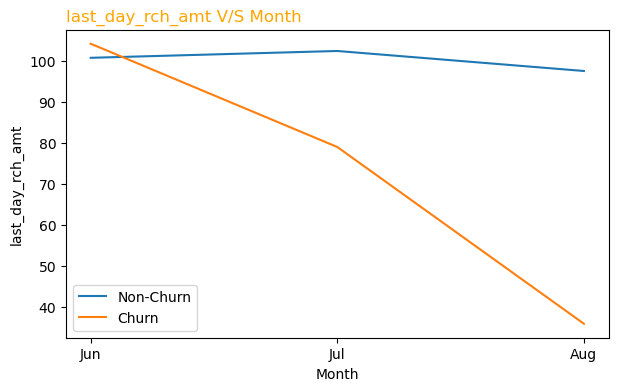

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.657232,102.318284,97.451724
1,104.085194,78.956989,35.955749


In [59]:
plot_byChurn(high_value_users,'last_day_rch_amt')

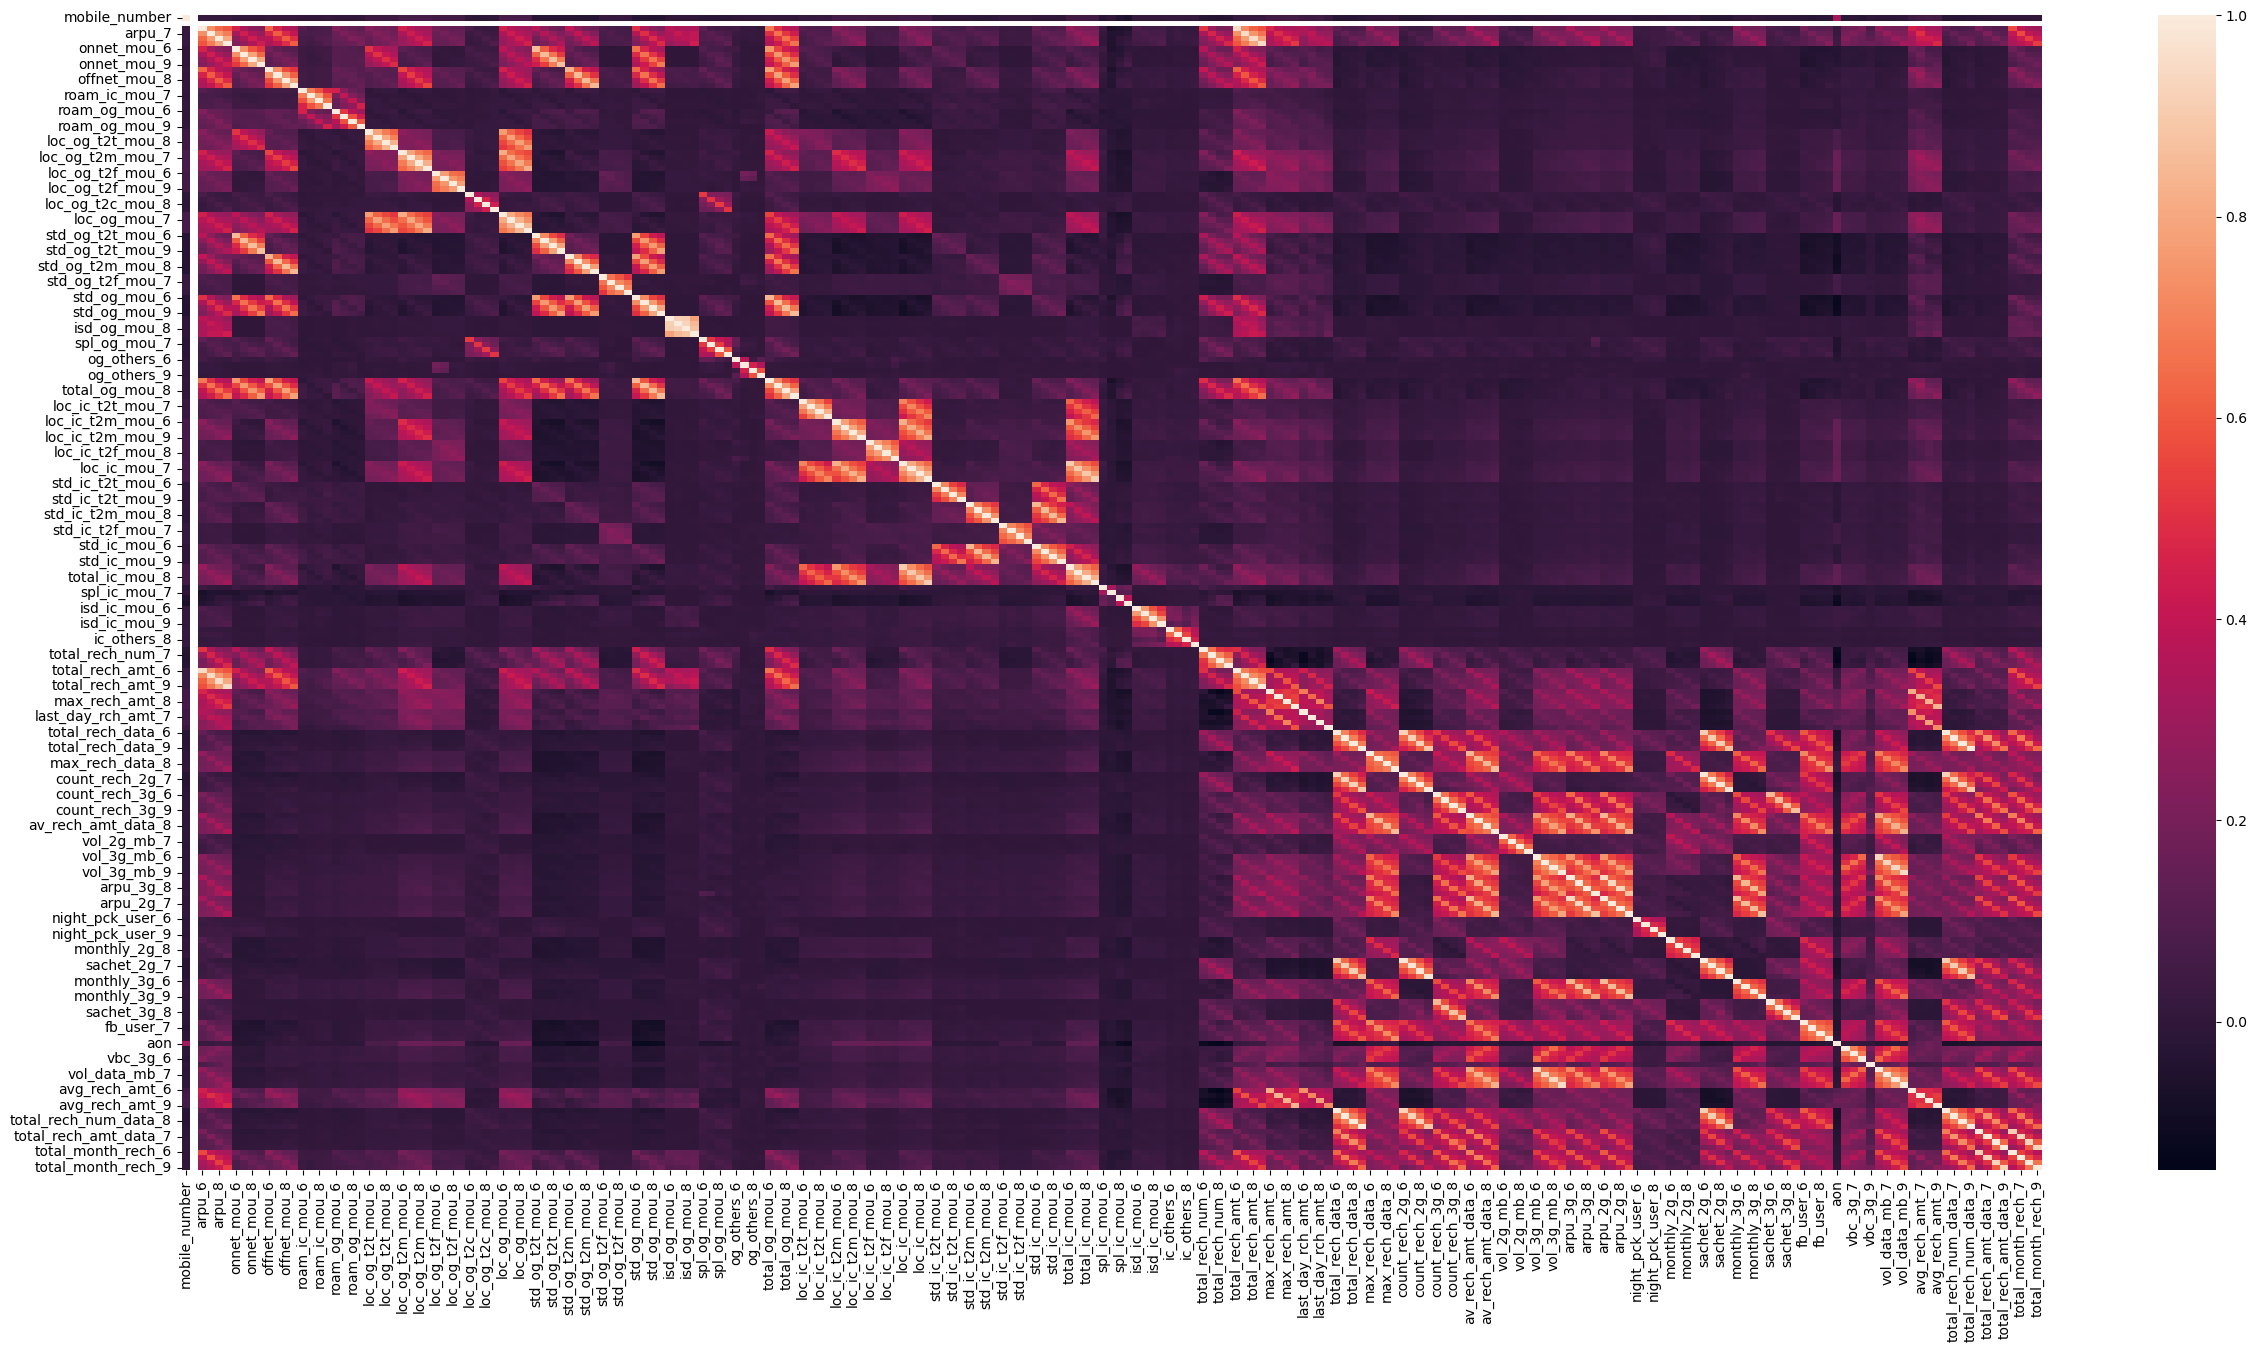

In [60]:
#finding the correlation matrix using heatmap
plt.figure(figsize=(30,15))
sns.heatmap(df.corr())
plt.show()

# Building a Model

In [61]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [62]:
def getModelMetrics(actual_churn=False,pred_churn=False):
    confusion = metrics.confusion_matrix(actual_churn, pred_churn)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    print('Specificity: {}'.format(TN / float(TN+FP)))
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))    


In [63]:
def predictChurnWithProb(model,X,y,prob):
    pred_probs = model.predict_proba(X)[:,1]    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [64]:
def OptimalCutoff(df):
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)

    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [65]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    alg.fit(X_train, y_train)        
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]

    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
     

In [66]:
hv_users_PCA = high_value_users.copy()
# removing the columns not required for modeling
hv_users_PCA.drop(['mobile_number'], axis=1, inplace=True)

In [67]:
# Removing the date  columns before PCA
dateTimeCols = list(hv_users_PCA.select_dtypes(include=['datetime64']).columns)
print(dateTimeCols)
hv_users_PCA.drop(dateTimeCols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [68]:
# X variables
X = hv_users_PCA.drop(['churn'], axis=1)
# Y variables
y = hv_users_PCA['churn']  

In [69]:
# Spiltting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Scaling features using MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on train
X_train = scaler.fit_transform(X_train)

# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

Now since we've built the training and test set we will handle the imbalance

In [70]:
# Handling the class imbalance
print("Before OverSampling, the count of label '1' is: {}".format(sum(y_train==1)))
print("Before OverSampling, the count of label '0' is: {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate is: {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, the count of label '1' is: 1700
Before OverSampling, the count of label '0' is: 19234 

Before OverSampling, churn event rate is: 8.12% 



In [71]:
# sm = SMOTE(random_state=42)
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [72]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38468, 178)
After OverSampling, the shape of train_y: (38468,) 

After OverSampling, counts of label '1': 19234
After OverSampling, counts of label '0': 19234
After OverSampling, churn event rate : 50.0% 



In [73]:
#Improting the PCA module
pca = PCA(svd_solver='randomized', random_state=100)

In [74]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(random_state=100, svd_solver='randomized')

In [75]:
pca.explained_variance_ratio_[:50]

array([0.52943253, 0.11613028, 0.08292588, 0.04669254, 0.02590296,
       0.02220639, 0.01966955, 0.0163294 , 0.01308142, 0.01177103,
       0.0090579 , 0.00844082, 0.00767876, 0.00592963, 0.00540776,
       0.00491405, 0.00396856, 0.00365744, 0.00351876, 0.00336531,
       0.00316534, 0.00311945, 0.00297922, 0.00264813, 0.00264101,
       0.00240347, 0.00234155, 0.00214153, 0.00210646, 0.00204967,
       0.00189871, 0.00177618, 0.00158665, 0.00136121, 0.00132115,
       0.0013041 , 0.00119334, 0.00114706, 0.001046  , 0.00091965,
       0.00082467, 0.00077877, 0.00075135, 0.0007494 , 0.0007283 ,
       0.00072105, 0.00065781, 0.00065022, 0.0006321 , 0.00061168])

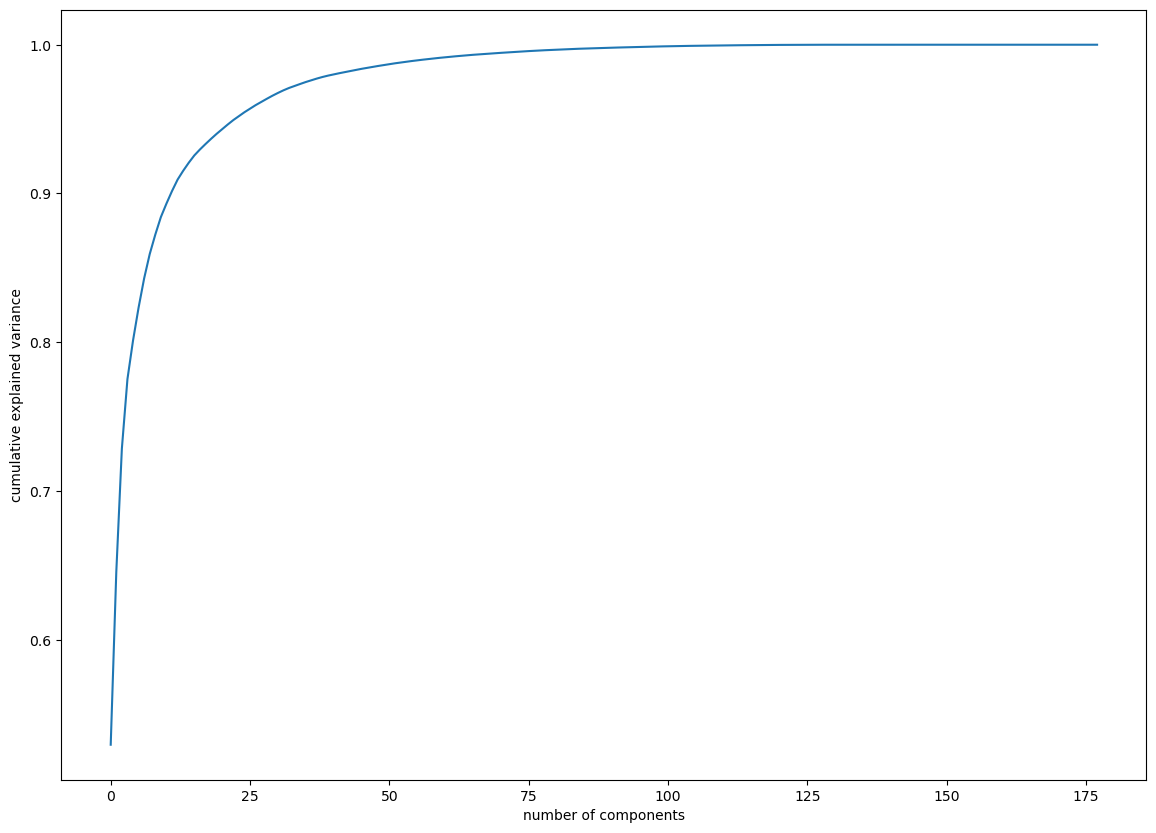

In [76]:
#Plotting scree plot 
%matplotlib inline
fig = plt.figure(figsize = (14,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We can see that 40 components are enough to describe 95% of the variance in the dataset. Selecting 40 components for our modeling

In [77]:
#Using incremental PCA for efficiency
pca_final = IncrementalPCA(n_components=40)

In [78]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38468, 40)

In [79]:
#Applying selected 40 components to the test data
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8972, 40)

For the prediction of churn customers, we'll fit variety of models and select the one which shall be the best predictor of churn. Models trained are:
1. Logistic Regression
2. Lasso regression 
3. Random Forest

# Logistic Regression

In [80]:
#Training the model on the train data
lr0 = LogisticRegression(class_weight='balanced')
modelfit(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.835
Recall/Sensitivity : 0.8514
AUC Score (Train): 0.906830
CV Score : Mean - 0.9060838 | Std - 0.003480931 | Min - 0.8999549 | Max - 0.910343


In [81]:
# predictions on Test data
pred_probs_test = lr0.predict(X_test_pca)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.8150947999889308
Sensitivity/Recall : 0.8050139275766016
Specificity: 0.82517567240126
False Positive Rate: 0.17482432759874
Positive predictive value: 0.28599703117268677
Negative Predictive value: 0.9798590130916415
sklearn precision score value: 0.28599703117268677


In [82]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.8235621934908605
Recall : 0.8050139275766016
Precision : 0.28599703117268677


In [83]:
#Making prediction on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.91


In [84]:
cut_off_prob=0.4
y_train_df = predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8222938546324218
Sensitivity/Recall : 0.8932619319954248
Specificity: 0.7513257772694187
False Positive Rate: 0.24867422273058126
Positive predictive value: 0.7822345656528865
Negative Predictive value: 0.8756059137178865
sklearn precision score value: 0.7822345656528865


,churn,churn_Prob,final_predicted
0,0,0.780119,1
1,0,0.009024,0
2,0,0.103529,0
3,0,0.025849,0
4,0,0.825639,1


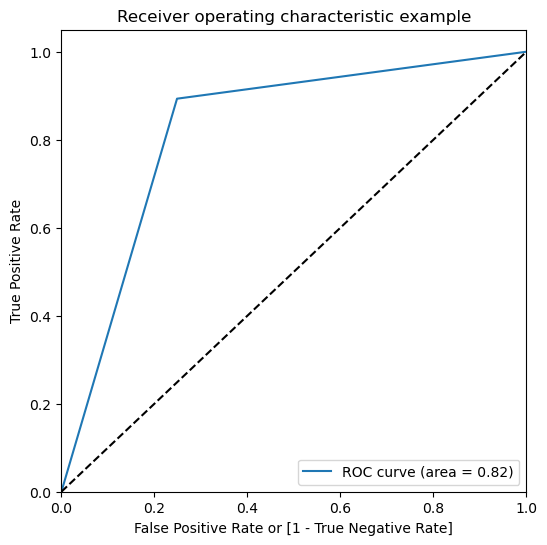

(array([0.        , 0.24867422, 1.        ]),
 array([0.        , 0.89326193, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [85]:
# Ploting ROC curve
draw_roc(y_train_df.churn, y_train_df.final_predicted)

In [86]:
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.82


     prob  accuracy     sensi     speci
0.0  0.0   0.500000  1.000000  0.000000
0.1  0.1   0.685869  0.980139  0.391598
0.2  0.2   0.754029  0.955859  0.552199
0.3  0.3   0.795934  0.927524  0.664344
0.4  0.4   0.822294  0.893262  0.751326
0.5  0.5   0.834980  0.851409  0.818550
0.6  0.6   0.835084  0.791983  0.878184
0.7  0.7   0.821072  0.724134  0.918010
0.8  0.8   0.784366  0.619008  0.949724
0.9  0.9   0.608012  0.231725  0.984299


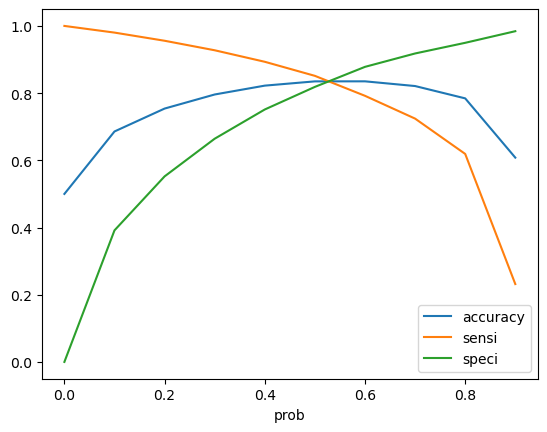

In [87]:
# Finding optimal cutoff point
OptimalCutoff(y_train_df)

From above cutoff optimal point is 0.5

In [88]:
# Since the cut-off is 0.5
cut_off = 0.5
predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob).head()

Roc_auc_score : 0.8222938546324218
Sensitivity/Recall : 0.8932619319954248
Specificity: 0.7513257772694187
False Positive Rate: 0.24867422273058126
Positive predictive value: 0.7822345656528865
Negative Predictive value: 0.8756059137178865
sklearn precision score value: 0.7822345656528865


,churn,churn_Prob,final_predicted
0,0,0.780119,1
1,0,0.009024,0
2,0,0.103529,0
3,0,0.025849,0
4,0,0.825639,1


In [89]:
# Prediction on test data and predicting with Cut-off
predictChurnWithProb(lr0,X_test_pca,y_test,cut_off).head()

Roc_auc_score : 0.8150947999889308
Sensitivity/Recall : 0.8050139275766016
Specificity: 0.82517567240126
False Positive Rate: 0.17482432759874
Positive predictive value: 0.28599703117268677
Negative Predictive value: 0.9798590130916415
sklearn precision score value: 0.28599703117268677


,churn,churn_Prob,final_predicted
4265,0,0.467180,0
29221,0,0.569447,1
974,0,0.400041,0
1602,0,0.319777,0
10225,0,0.132896,0


# Random Forest

In [90]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

In [91]:
# Tuning Max_depth
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, cv=5, scoring="f1", return_train_score=True)
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='f1')

In [92]:
scores = rfgs.cv_results_
print(scores)

{'mean_fit_time': array([52.41288242, 66.59390492, 75.12075701, 80.05593667]), 'std_fit_time': array([0.62043999, 0.63963006, 1.28813118, 0.66424358]), 'mean_score_time': array([0.24515963, 0.27468653, 0.36104798, 0.37300992]), 'std_score_time': array([0.02485586, 0.05965923, 0.02908274, 0.02009866]), 'param_max_depth': masked_array(data=[10, 15, 20, 25],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 10}, {'max_depth': 15}, {'max_depth': 20}, {'max_depth': 25}], 'split0_test_score': array([0.89163132, 0.9399722 , 0.95104364, 0.95543989]), 'split1_test_score': array([0.89462863, 0.93514405, 0.94708726, 0.94833291]), 'split2_test_score': array([0.88646288, 0.9339263 , 0.94571865, 0.95084485]), 'split3_test_score': array([0.89205128, 0.93773825, 0.94743557, 0.95039632]), 'split4_test_score': array([0.89299461, 0.94187666, 0.95074456, 0.95221058]), 'mean_test_score': array([0.89155374, 0.93773149, 0.94840594, 0.95

In [93]:
max_depth = scores["param_max_depth"].tolist()
train_mean_score = scores["mean_train_score"].tolist()
test_mean_score = scores["mean_test_score"].tolist()

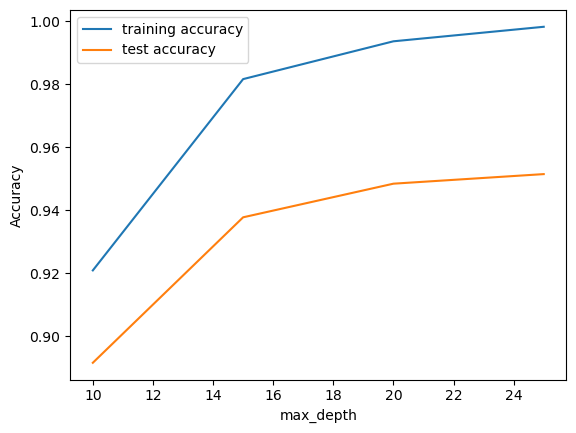

In [94]:
# plotting accuracies after tuning Random forest  max_depth
plt.figure()
plt.plot(max_depth, train_mean_score,label="training accuracy")
plt.plot(max_depth, test_mean_score, label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [95]:
#Tuning n-estimator
parameters = {'n_estimators': range(40, 140, 35)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1, parameters,  cv=3,  scoring="recall",return_train_score=True)

In [96]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, random_state=10),
             param_grid={'n_estimators': range(40, 140, 35)},
             return_train_score=True, scoring='recall')

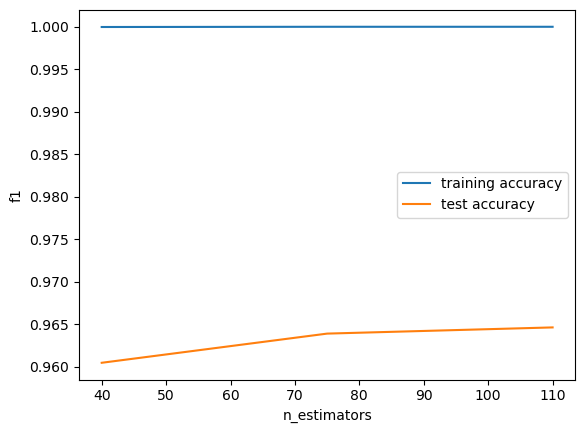

In [97]:
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

In [1]:
# tuning max features
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs = GridSearchCV(rf3, parameters,  cv=5, scoring="f1")
rfgs.fit(X_train_pca,y_train_res)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
#Tuning min sample leaf
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,random_state=10)
rfgs = GridSearchCV(rf4, parameters, cv=3, scoring="f1")
rfgs.fit(X_train_pca,y_train_res)

In [ ]:
# Tuning min sample split
parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, parameters, cv=3, scoring="f1")
rfgs.fit(X_train_pca,y_train_res)

In [ ]:
random_forest_final = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,min_samples_split=150,random_state=10)
print("Model performance on Train data:")
modelfit(random_forest_final,X_train_pca,y_train_res)


In [ ]:
# predict on test data
predictions = random_forest_final.predict(X_test_pca)
print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

In [ ]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(random_forest_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

In [ ]:
# finding cut-off with the right balance of the metrices
OptimalCutoff(y_train_df)

In [ ]:
cut_off_prob=0.5
predictChurnWithProb(random_forest_final,X_train_pca,y_train_res,cut_off_prob).head()

In [ ]:
cut_off_prob=0.5
predictChurnWithProb(random_forest_final,X_train_pca,y_train_res,cut_off_prob).head()

In [ ]:
# Making prediction on test set
y_test_df= predictChurnWithProb(random_forest_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt0 = DecisionTreeClassifier(class_weight='balanced',max_features='auto',min_samples_split=100,min_samples_leaf=100,max_depth=6,random_state=10)
modelfit(dt0, X_train_pca, y_train_res)

In [ ]:
# Making predictions and displaying the model metrices
pred_probs_test = dt0.predict(X_test_pca)
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {'max_depth': range(5,15,3),'min_samples_leaf': range(100, 400, 50),'min_samples_split': range(100, 400, 100),'max_features': [8,10,15]}

In [ ]:
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

In [ ]:
# Optimal accuracy score
print(grid_search.best_score_)

In [ ]:
# to see hyperparameter
print(grid_search.best_params_)

In [ ]:
# Model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',max_depth=11, min_samples_leaf=100, min_samples_split=100, max_features=15,random_state=10)
modelfit(dt_final,X_train_pca,y_train_res)

In [ ]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

In [ ]:
# to print  classification report
print(classification_report(y_test,pred_probs_test))

In [ ]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

In [ ]:
# finding cut-off with the right balance of the metrices
OptimalCutoff(y_train_df)

In [ ]:
# predicting churn with cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

In [ ]:
# Performing on Test Data
y_test_df= predictChurnWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Decision tree after selecting optimal cut-off also is resulting in a model with

- Train Recall : 84.52% and Train Roc_auc_score : 83.72
- Test Recall : 70.19% and Test Roc_auc_score : 76.03

# Final Model Choice
Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives.

Overall, the Logistic Regression model with probability cut-off = 0.5, performs best. It achieved the best recall accuracy of 80.05% for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it.

From the Tree Family, the Decision Tree overfitted the data slightly while obtaining 70.19% recall accuracy on test data. The Random Forest avoided overfitting but obtained only 74.37% recall accuracy on test data.

In [ ]:
# Identifying relevant churn features

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {'max_depth': [8,10,12],'min_samples_leaf': range(100, 400, 200),'min_samples_split': range(200, 500, 200), 'n_estimators': [100,200, 300], 'max_features': [12, 15, 20]}


# Create a based model
rf = RandomForestClassifier()


# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = 4,verbose = 1)


# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

In [ ]:
# checking Optimal accuracy score
print(grid_search.best_score_)

In [ ]:
# Hyperparameters
print(grid_search.best_params_)

In [ ]:
rf = RandomForestClassifier(max_depth=12, max_features=20, min_samples_leaf=100, min_samples_split=200, n_estimators=300, random_state=10)
rf.fit(X_train_res, y_train_res)

In [ ]:
plt.figure(figsize=(15,30))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

The graph above suggest that the top 25 features ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8 i.e., the action month. From this, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers.

Specifically, these features are as follows:

- total_ic_mou_8 -- Total incoming minutes of usage in month 8
- loc_ic_mou_8 -- local incoming minutes of usage in month 8
- total_month_rech_8 -- Total month recharge amount in month 8
- total_roam_mou_8 -- Total incoming+outgoing roaming minutes of usage in month 8
- loc_ic_t2m_mou_8 -- local incoming calls to another operator minutes of usage in month 8
- roam_og_mou_8 -- outgoing roaming calls minutes of usage in month 8
- Total_loc_mou_8 -- Total local minutes of usage in month 8
- roam_ic_mou_8 -- incoming roaming calls minutes of usage in month 8
- total_rech_amt_8 -- total recharge amount in month 8
- loc_ic_t2t_mou_8 -- local incoming calls from same operator minutes of usage in month 8
- max_rech_amt_8 -- maximum recharge amount in month 8
- last_day_rch_amt_8 -- last (most recent) recharge amount in month 8
- arpu_8 -- average revenue per user in month 8
- loc_og_mou_8 -- local outgoing calls minutes of usage in month 8
- loc_og_t2n_mou_8 -- local outgoing calls minutes of usage to other operator mobile in month 8
- av_rech_amt_data_8 -- average recharge amount for mobile data in month 8
- total_rech_data_8 -- total data recharge (MB) in month 8
- total_og_t2t_mou_8 -- total outgoing calls from same operator minutes of usage in month 8
- total_rech_num_8 -- total number of recharges done in the month 8
- total_rech_amt_data_8 -- total recharge amount for data in month 8
- max_rech_data_8 -- maximum data recharge (MB) in month 8
- avg_rech_amt_8 -- average recharge amount in month 8
- fb_user_8 -- services of Facebook and similar social networking sites for month 8
- vol_data_mb_8 -- volume of data (MB) consumed for month 8
- count_rech_2g_8 -- Number of 2g data recharge in month 8
- loc_og_to_ic_mou_8 -- local outgoing to incoming mou ratio for month of 8
- spl_og_mou_7 -- Special outgoing call for the month of 7

# Conclusion
- On careful observation, we initially found that the Churner's outgoing usage was more than that of Non-Churners, but Gradually they dropped there outgoing usage. Naturally they might have found some shortcomings in the network or billing plan.

- Hence it will be a good stratergy for-

 - The Network operators to investigate their outgoing tariffs plans.

 - The outgoing tariffs offered to the customer might be less attractive than the outgoing tariffs compared of their competitors.

 - New campaigns which targets the customers with high outgoing usage be rolled out as,

    (i) For every X Minutes of usage of voice calls, the company can grant customer with some percentage of X free Minutes  of usage of voice calls.

    (ii) Discount rates on outgoing calls during the non-peak hours of a day.

    (iii) Investigate and revise the outgoing tariffs to make them dynamically more competitive.

    (iv) The company can offer plans as per the trend and value of the customer.

Therefore prescribed suggestion to manage the customer churn is as following:
- Churners show higher roaming usage than Non-Churners.

- The Network operators must futher investigate their roaming tariffs, and quality of service.

- It can be a case that the roaming tariffs offered are less competitive than their competitor.

- It can be a case that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality needs to be investigated.

- New campaigns which targets the roaming customers can be rolled out. Such as:

    (i) Discounted roaming rates during particular hours of the day

    (ii) Free monthly roaming on minutes of usage of voice calls depending on the users past roaming usage history.